# Inferential statistics II - Bootstrapping

In [262]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

## Medical charge data set

In [263]:
med_charges = pd.read_csv('data/insurance2.csv')

In [264]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [265]:
np.random.seed(47)
N_rep = 10000 

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

# EDA between insuranceclaim and charges

In [266]:
med_charges['insured']= med_charges.insuranceclaim[med_charges['insuranceclaim'] == 0]
med_charges['noninsured']= med_charges.insuranceclaim[med_charges['insuranceclaim'] == 1]
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,insured,noninsured
0,19,0,27.900,0,1,3,16884.92400,1,NaN,1.0
1,18,1,33.770,1,0,2,1725.55230,1,NaN,1.0
2,28,1,33.000,3,0,2,4449.46200,0,0.0,NaN
3,33,1,22.705,0,0,1,21984.47061,0,0.0,NaN
4,32,1,28.880,0,0,1,3866.85520,1,NaN,1.0


In [267]:
med_charges.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,insured,noninsured
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,555.0,783.0
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202,0.0,1.0
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871,0.0,0.0
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000,0.0,1.0
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000,0.0,1.0
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000,0.0,1.0
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000,0.0,1.0
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000,0.0,1.0


In [268]:
# Mean of charges grouped by insured- non-insured
med_charges[["charges","insuranceclaim"]].groupby(["insuranceclaim"], as_index = False).mean()

,insuranceclaim,charges
0,0,8821.421892
1,1,16423.928277


In [269]:
# STD of charges grouped by insured- non-insured
med_charges[["charges","insuranceclaim"]].groupby(["insuranceclaim"], as_index = False).std()

,insuranceclaim,charges
0,0.0,6446.510127
1,1.0,14045.928419


In [270]:
# Difference of the claim charges std: std_diff
std_diff = np.std(med_charges.charges[med_charges['insuranceclaim'] == 1]) - np.std(med_charges.charges[med_charges['insuranceclaim'] == 0])
std_diff

7596.256408655178

# Visualization for insuranceclaim and charges

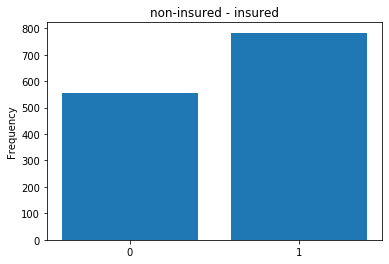

1    783
0    555
Name: insuranceclaim, dtype: int64


In [271]:

varValue = med_charges.insuranceclaim.value_counts()
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title('non-insured - insured')
plt.show()
print(varValue)

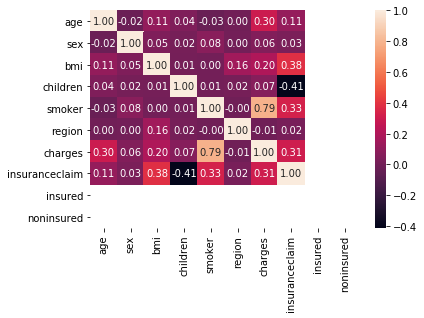

In [272]:
sns.heatmap(med_charges.corr(), annot = True, fmt = ".2f")
plt.show()

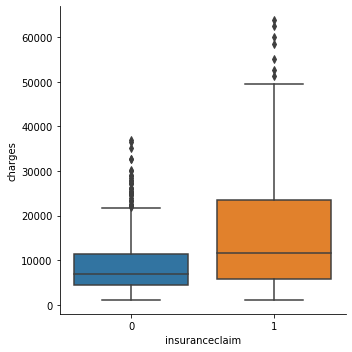

In [273]:
sns.catplot(x = "insuranceclaim", y = "charges", data = med_charges, kind = "box")
plt.show()

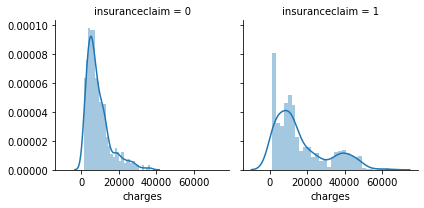

In [274]:
g = sns.FacetGrid(med_charges, col = "insuranceclaim")
g.map(sns.distplot, "charges", bins = 30)
plt.show()

# Bootstrap confidence intervals

In [275]:
#Generating bootstrap replicates

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [276]:
# Generating many bootstrap replicates

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

330.943713906084
331.9939687156728


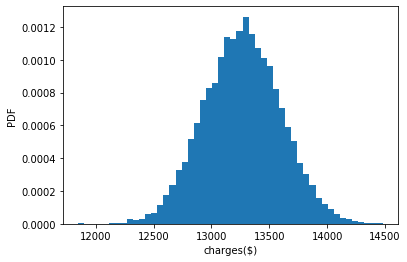

In [277]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(med_charges.charges, np.mean, 10000)

# Compute and print SEM
sem = np.std(med_charges.charges) / np.sqrt(len(med_charges.charges))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('charges($)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Confidence interval on the rate of no-hitters

95% confidence interval = [12610.26830214 13917.08973413] charges


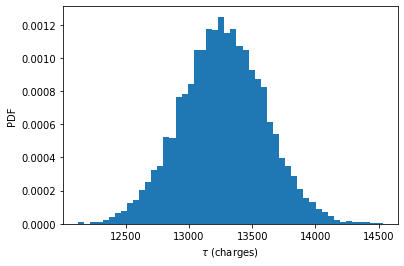

In [278]:
# Draw bootstrap replicates of the mean charges (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(med_charges.charges, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'charges')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (charges)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

In [279]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [280]:

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Create 2 Arrays of Charges for non-insureds and insureds 

In [281]:
# The charges for non-insureds'
force_a = med_charges.charges[med_charges.insuranceclaim == 0]
# The charges for insureds'
force_b = med_charges.charges[med_charges.insuranceclaim == 1]

# Permutation test

In [282]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 1.0


# A one-sample bootstrap hypothesis test

In [283]:
 # Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.05 #The number mentioned in the question

# Take bootstrap replicates of translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  1.0


# A two-sample bootstrap hypothesis test for difference of means 

In [284]:
# Compute mean of all forces: mean_force
mean_force = np.mean(med_charges.charges)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 1.0


# Test Correlation

## Create 'control' and 'treated' data to examine

In [285]:
#charges for non-insureds'
control = med_charges.charges[med_charges.insuranceclaim == 0]

#charges for insureds'
#aim to see how charges effected by insurance
treated = med_charges.charges[med_charges.insuranceclaim == 0]

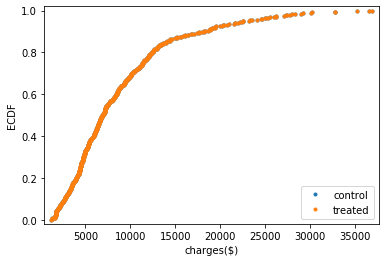

In [286]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('charges($)')
plt.ylabel('ECDF')
plt.show()


# Bootstrap hypothesis test

In [287]:
# Compute the difference in mean of charges between insured and non-insured: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated )))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.5086


# Simulating a null hypothesis concerning correlation / Hypothesis test on Pearson correlation

In [288]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[1,0]

In [289]:
# Compute observed correlation: r_obs
r_obs = pearson_r(force_a, force_b)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(0, 10000):
    # Permute force_a measurments: force_a_permuted
    force_a_permuted = np.random.permutation(force_a)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(force_a_permuted, force_b)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/ len(force_a_permuted)
print('p-val =', p)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__